# D1AED – Analise Estâtística para Ciência de Dados

## Atividâde em Dupla 1

### Alunos
Evandro Henrique Couto de Paula. Prontuário: CP301358-8<br>
Jessé de Freitas. Prontuário:

# 1 - Importações e carregamento dos datasets

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
# Carregando datasets
movies = pd.read_csv('ml-latest-small/movies.csv')
links = pd.read_csv('ml-latest-small/links.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

# 2 -  Observaçoões sobre a análise

## dificuldades
Para realizar as análises dos filmes foi necessário realizar alguns ajutes a fim de sanar algumas questões, por exemplo, foi necessário trabalho para extrair a data de lançamento da coluna de título do filme.
Outro grande desafio foi trabalhar com os generos dos filmes realizar uma análise dos categorias se mostrou bastante desafiador e exigiu um certo trabalho para que pudesse ser idealmente trabalhado.

# 3- Analise Exploratória

### Análise movies

In [90]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


#### Tipos de dados do dataset movie

| Coluna  | Tipo                  |Função|
|---------|-----------------------|------|
| movieId | Quantitativo discreto |Indice identificador do filme
| title   | Qualitativo nominal   |Título do filme|
| genres  | Qualitativo nominal   |Gênero atribuído ao filme|

#### Gêneros disponíveis

In [91]:
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

genre_labels

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

#### Extraíndo data de lançamento dos filmes

In [92]:
pd.options.display.max_rows = 10
movies['title'] = movies['title'].str.strip()
movies['title'].str.slice(start=-5, stop=-1)
movies['release_year'] = movies['title'].str.slice(start=-5, stop=-1)
movies['release_year'] = movies.release_year.str.replace('\)','', regex=True)
movies['release_year'] = movies.release_year.str.replace('\(','', regex=True)
movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce', downcast='signed').astype(pd.Int64Dtype())
movies['release_year'].drop_duplicates()

0       1995
48      1994
54      1996
98      1976
105     1992
        ... 
8439    2015
8684    2016
8687    2017
8693    2018
9020    1908
Name: release_year, Length: 107, dtype: Int64

### Análise links

In [93]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


| Coluna  | Tipo                  |Função|
|---------|-----------------------|------|
| movieId | Quantitativo discreto |Identificador do filme|
| imdbId  | Qualitativo nominal   |Identificador do filme na base do Imdb|
| tmdbId  | Qualitativo continuo  |Identificador do filme na base do tmdb|

### Análise tags

In [94]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


| Coluna    | Tipo                  |Função|
|-----------|-----------------------|-------|
| userId    | Quantitativo discreto |Identificador do usuário|
| movieId   | Quantitativo discreto |Identificador do filme|
| tag       | Qualitativo nominal   |Marcação adicionado ao filme pelo usuário|
| timestamp | Quantitativo discreto |Horário da marcação do usuário|

### Análise ratings

In [95]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


| Coluna    | Tipo                 |Função|
|-----------|----------------------|-------|
| userId    | Quantitativo discreto  | Identificador do usuário|
| movieId   | Quantitativo discreto  | Identificador do Filme|
| rating    | Quantitativo continuo | Nota atrbuída ao filme pelo usuário|
| timestamp | Quantitativo discreto  | Marcação do tempo do horário da avaliação|

## Fundindo dataframes para análise

In [96]:
movies_ratings = movies.merge(ratings,on='movieId')

In [97]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   movieId       100836 non-null  int64  
 1   title         100836 non-null  object 
 2   genres        100836 non-null  object 
 3   release_year  100819 non-null  Int64  
 4   userId        100836 non-null  int64  
 5   rating        100836 non-null  float64
 6   timestamp     100836 non-null  int64  
dtypes: Int64(1), float64(1), int64(3), object(2)
memory usage: 6.3+ MB


In [98]:
movies_ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [99]:
movies_rating_clear = movies_ratings[movies_ratings['release_year'].notna()]
mean_per_year = movies_rating_clear.groupby('release_year').mean().rating

## Removendo Outliers

In [100]:
rating_outlier = movies_rating_clear['rating']
stats = movies_rating_clear.describe()
Q1 = stats.loc['25%', 'rating']
Q3 = stats.loc['75%', 'rating']

IQR = Q3 - Q1

# intervalo sem outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

query = (rating_outlier >= lower_bound) & (rating_outlier <= upper_bound)
movies_rating_clear_without_outlier = movies_rating_clear[query]
movies_rating_clear_without_outlier['rating'].describe()

count    96640.000000
mean         3.616805
std          0.900488
min          1.500000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

## Preparando as Tags

In [132]:
tags['tag'] = tags['tag'].str.lower()
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,boxing story,1445715207
4,2,89774,mma,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


## 3.1 -  Existe alguma correlação entre o ano de lançamento do filme e sua avaliação média (média de ratings)?

In [101]:
correlation_mean_yaer = movies_rating_clear[['release_year', 'rating']].corr()
correlation_mean_yaer

,release_year,rating
release_year,1.000000,-0.084033
rating,-0.084033,1.000000


In [102]:
print(f"O coeficiente de correlação entre o ano de lançamento dos filmes e suas avaliações é de {correlation_mean_yaer.loc['release_year', 'rating']}")

O coeficiente de correlação entre o ano de lançamento dos filmes e suas avaliações é de -0.08403310469227955


## 3.2 - Qual o grupo mais disperso, o de usuários que avaliaram ou o de usuários que rotularam filmes? 

In [141]:
user_rating = ratings.groupby('userId')
user_tags = tags.groupby('userId')

user_rating['rating'].count()
user_tags['tag'].count()


userId
2        9
7        1
18      16
21       4
49       3
      ... 
573     31
599    323
600      1
606      7
610      3
Name: tag, Length: 58, dtype: int64

## 3.3 - Qual a categoria rotulada mais frequente?

In [103]:
#Separendo a coluna de generos e expandindo o resultado para um dataframe
genres_series = movies['genres'].str.split('|', expand=True)

#Agrupando o dataframe em uma serie
genres_series_to_count = genres_series.stack()

#Realizando a contragem de aparição de generos
genres_series_to_count.value_counts()

#Apresentando a contagem de categorias
genres_count = pd.DataFrame(genres_series_to_count.value_counts()).reset_index()
genres_count.columns = ['Genre','Count']
genres_count

,Genre,Count
0,Drama,4361
1,Comedy,3756
2,Thriller,1894
3,Action,1828
4,Romance,1596
...,...,...
15,Musical,334
16,Western,167
17,IMAX,158
18,Film-Noir,87


In [104]:
print(f"A categoria rotulada com mais frequência é de {genres_count['Genre'][0]}")

A categoria rotulada com mais frequência é de Drama


[Text(0.5, 0, 'Contagem'),
 Text(0, 0.5, 'Genero'),
 Text(0.5, 1.0, 'Frequencia de rotulação')]

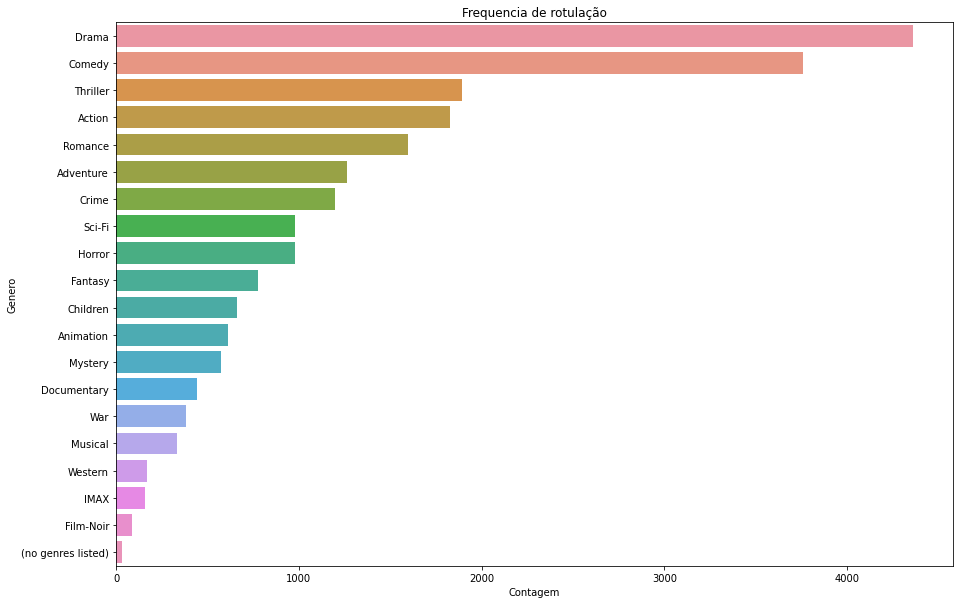

In [105]:
plt.figure(figsize=(15, 10))
freqence_genre = sns.barplot(data=genres_count, y=genres_count['Genre'], x=genres_count['Count'])
freqence_genre.set(xlabel="Contagem", ylabel="Genero", title="Frequencia de rotulação")

## 3.4 - Como estão distribuídas as avaliações ao longo do tempo?

<AxesSubplot:title={'center':'Evolução das média de acordo com o ano de lançamento'}, xlabel='Ano de lançamento', ylabel='Média'>

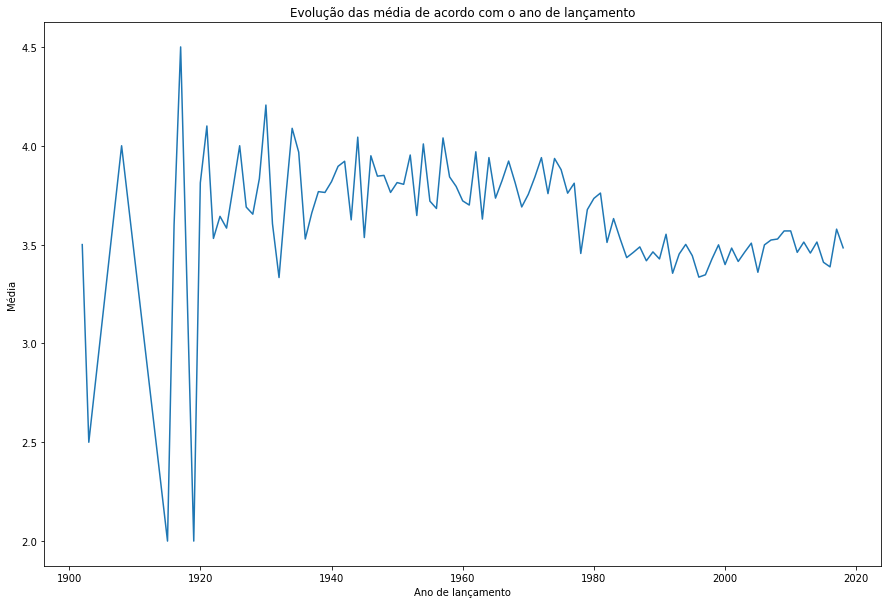

In [106]:
plt.figure(figsize=(15, 10))
graph_mean_evolution = sns.lineplot(x=mean_per_year.index, y=mean_per_year.values, data=mean_per_year)
graph_mean_evolution.set(ylabel="Média", xlabel="Ano de lançamento", title="Evolução das média de acordo com o ano de lançamento")
graph_mean_evolution

## 3.5 - A média de notas significa grande número de avaliações?

In [107]:
movie_mean = movies_rating_clear.groupby('movieId')['rating'].mean()
movie_evaluation = movies_rating_clear.groupby('movieId')['rating'].count()
movie_mean_evaluation = pd.DataFrame({"Média de Notas": movie_mean, "Número de Avaliações": movie_evaluation})
movie_mean_evaluation.sort_values(by='Número de Avaliações', ascending=False)

,Média de Notas,Número de Avaliações
movieId,,
356,4.164134,329
318,4.429022,317
296,4.197068,307
593,4.161290,279
2571,4.192446,278
...,...,...
71268,5.000000,1
6329,3.000000,1
71302,4.500000,1


## 3.6 - As piores notas são de filmes muito avaliados?

In [108]:
movie_mean_evaluation.sort_values(by='Média de Notas', ascending=True)

,Média de Notas,Número de Avaliações
movieId,,
5356,0.5,1
8494,0.5,1
5105,0.5,1
8632,0.5,1
144352,0.5,1
...,...,...
170777,5.0,1
4402,5.0,1
96430,5.0,1


## 3.7 -  Quais as cetegorias com a melhores médias?

In [109]:
genre_rating = movies_rating_clear_without_outlier[['genres','rating']].reset_index()
ratings_genre = {}
for i in range(len(genres_count['Genre'])):
    genre = genres_count['Genre'][i]
    ratings_genre[genre] = genre_rating[genre_rating['genres'].str.contains(genres_count['Genre'][i])]['rating']

mean_for_genre = {}
for key in ratings_genre:
    mean_for_genre[key] = ratings_genre[key].mean()

movies_genre_mean_df = pd.DataFrame(mean_for_genre, index=[0]).T.reset_index()
movies_genre_mean_df.columns = ['genero', 'media']
movies_genre_mean_df.sort_values(by='media', ascending=False, inplace=True)
movies_genre_mean_df.reset_index(drop=True)

/Users/evandrodepaula/Documents/pos/ds/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,genero,media
0,Film-Noir,3.972547
1,War,3.890357
2,Documentary,3.851713
3,Crime,3.740560
4,Drama,3.739405
...,...,...
15,Sci-Fi,3.586729
16,Action,3.568772
17,Children,3.552415
18,Comedy,3.518502


[Text(0.5, 1.0, 'Categorias com melhores avalaiações')]

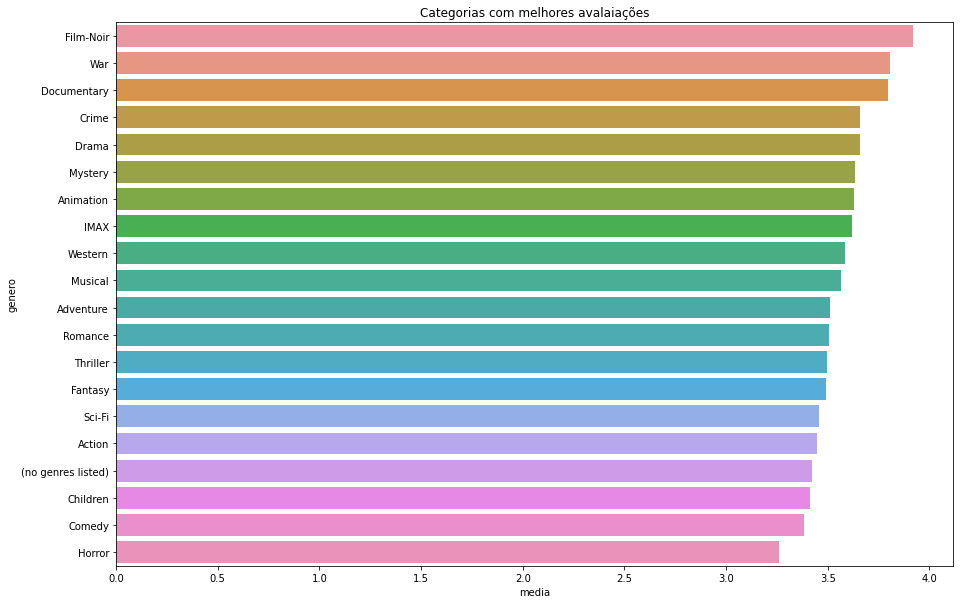

In [124]:
plt.figure(figsize=(15, 10))
best_genre = sns.barplot(data=movies_genre_mean_df, y=movies_genre_mean_df['genero'], x=movies_genre_mean_df['media'])
best_genre.set(title="Categorias com melhores avalaiações")

[Text(0.5, 0, 'Média dos generos'),
 Text(0.5, 1.0, 'Distribuição das médias dos generos')]

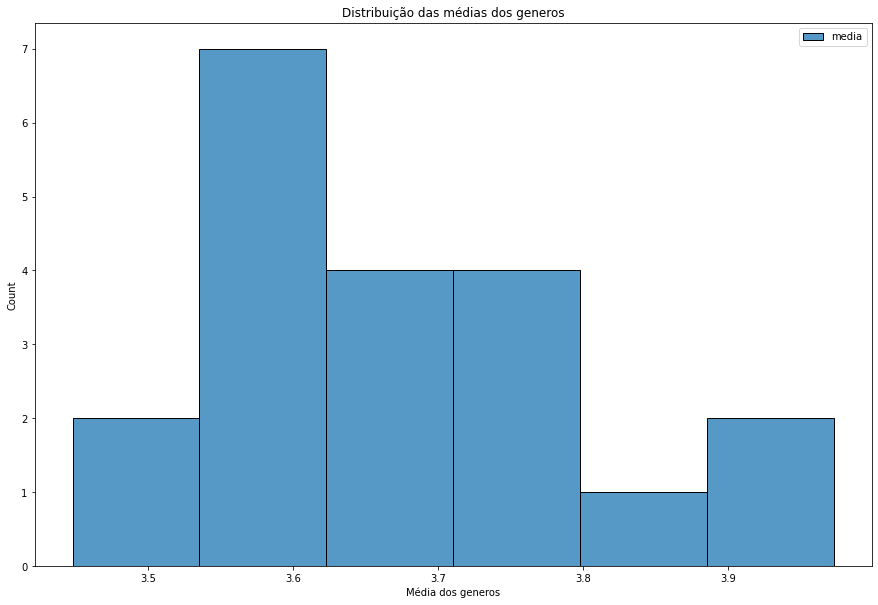

In [110]:
plt.figure(figsize=(15, 10))
hist_genre_mean = sns.histplot(data=movies_genre_mean_df)
hist_genre_mean.set(xlabel='Média dos generos', title= "Distribuição das médias dos generos", )

## 3.8 - Os outliers influenciam nas análises

In [119]:
genre_rating_with_outliers = movies_rating_clear[['genres','rating']].reset_index()
ratings_genre = {}
for i in range(len(genres_count['Genre'])):
    genre = genres_count['Genre'][i]
    ratings_genre[genre] = genre_rating_with_outliers[genre_rating_with_outliers['genres'].str.contains(genres_count['Genre'][i])]['rating']

mean_for_genre = {}
for key in ratings_genre:
    mean_for_genre[key] = ratings_genre[key].mean()

movies_genre_mean_df_with_outlier = pd.DataFrame(mean_for_genre, index=[0]).T.reset_index()
movies_genre_mean_df_with_outlier.columns = ['genero', 'media']
movies_genre_mean_df_with_outlier.sort_values(by='media', ascending=False, inplace=True)

/Users/evandrodepaula/Documents/pos/ds/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


#### Com outliers

In [120]:
movies_genre_mean_df_with_outlier.reset_index(drop=True)

,genero,media
0,Film-Noir,3.920115
1,War,3.808294
2,Documentary,3.797785
3,Crime,3.658294
4,Drama,3.656168
...,...,...
15,Action,3.447978
16,(no genres listed),3.421053
17,Children,3.412956
18,Comedy,3.384721


#### Sem outliers

In [121]:
movies_genre_mean_df.reset_index(drop=True)

,genero,media
0,Film-Noir,3.920115
1,War,3.808294
2,Documentary,3.797785
3,Crime,3.658294
4,Drama,3.656168
...,...,...
15,Action,3.447978
16,(no genres listed),3.421053
17,Children,3.412956
18,Comedy,3.384721


## 3.9 -

## 3.10 -